In [21]:
# Importing necessary libraries for data manipulation, machine learning model building, evaluation, and visualization
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the CSV file
df = pd.read_csv('/content/churn.csv')

# Display the first few rows to understand the data
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [7]:
# Selecting features and target
X = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
        'NumOfProducts', 'EstimatedSalary']]
y = df['Exited']

In [8]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)


In [11]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [12]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


In [13]:
# Function to evaluate models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [14]:
# Evaluating Logistic Regression
accuracy_log, precision_log, recall_log, f1_log = evaluate_model(y_test, y_pred_log_reg)
print(f"Logistic Regression - Accuracy: {accuracy_log}, Precision: {precision_log}, Recall: {recall_log}, F1 Score: {f1_log}")

Logistic Regression - Accuracy: 0.791, Precision: 0.3626373626373626, Recall: 0.08396946564885496, F1 Score: 0.13636363636363635


In [15]:
# Evaluating Random Forest
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}")

Random Forest - Accuracy: 0.8485, Precision: 0.6923076923076923, Recall: 0.4122137404580153, F1 Score: 0.5167464114832536


In [16]:
# Evaluating Gradient Boosting
accuracy_gb, precision_gb, recall_gb, f1_gb = evaluate_model(y_test, y_pred_gb)
print(f"Gradient Boosting - Accuracy: {accuracy_gb}, Precision: {precision_gb}, Recall: {recall_gb}, F1 Score: {f1_gb}")

Gradient Boosting - Accuracy: 0.8575, Precision: 0.7195121951219512, Recall: 0.45038167938931295, F1 Score: 0.5539906103286385


In [22]:
# Plotting Feature Importance for Random Forest
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)

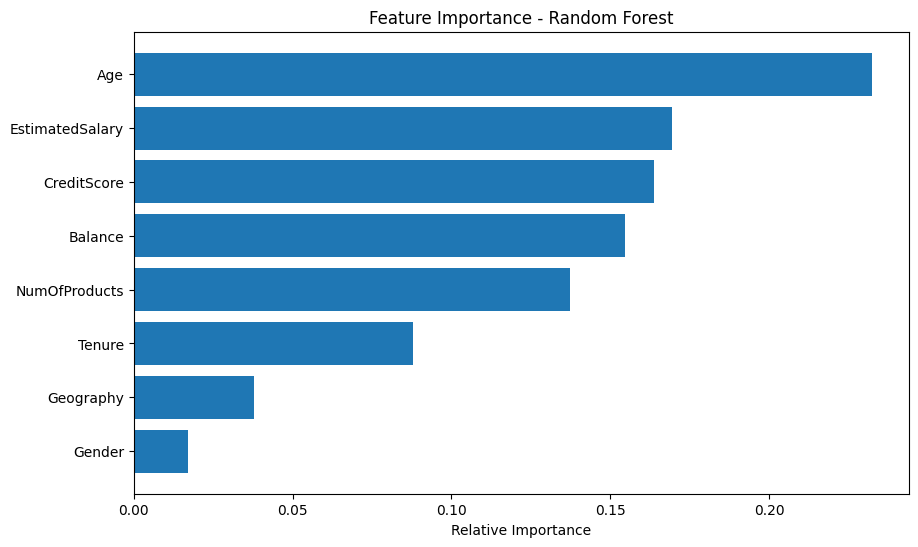

In [23]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importance - Random Forest')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()